In [40]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [41]:
# Create a new instance of the Microsoft Edge WebDriver
driver = webdriver.Edge()

In [42]:
# Navigate to the YouTube video page
driver.get("https://www.youtube.com/watch?v=HN54x-eShFU")

# Give some time for the video to load
time.sleep(5)

In [43]:
# Scroll down to load comments
SCROLL_PAUSE_TIME = 2
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Find and extract comments
comments_elements = driver.find_elements(By.CSS_SELECTOR, "#content-text")
comments = [comment.text for comment in comments_elements]

# Close the WebDriver
driver.quit()

In [44]:
# Create a DataFrame
df = pd.DataFrame({'Comments': comments})

# Print the DataFrame
print(df)

# Optionally, you can export the DataFrame to a CSV file
df.to_csv('comments_dataframe.csv', index=False)

                                               Comments
0     Vj siddhu va pudichavanga like podunga thanks ...
1                   Soori anna va yaruku ellam pudikum 
2     21:12  No Vlog channel would have given such H...
3                      15:54 That “Ennapaaa” felt Cute 
4               0% cringe\n100% comedy Vj siddhu vlogs 
...                                                 ...
1096                                                 Hi
1097                                             Solllu
1098                           Apo srilanka avalodhaana
1099                     Harshath vara vara cringe Lita
1100               Mansula irukura barame koranchidichi

[1101 rows x 1 columns]


In [45]:
# Separate time and comments
df['Time'] = df['Comments'].str.extract(r'(\d{1,2}:\d{2})')
df['Comment'] = df['Comments'].str.replace(r'\d{1,2}:\d{2}', '').str.strip()

In [46]:

# Reorder columns
df = df[['Time', 'Comment']]

# Print DataFrame
print(df)

       Time                                            Comment
0       NaN  Vj siddhu va pudichavanga like podunga thanks ...
1       NaN                 Soori anna va yaruku ellam pudikum
2     21:12  21:12  No Vlog channel would have given such H...
3     15:54                    15:54 That “Ennapaaa” felt Cute
4       NaN             0% cringe\n100% comedy Vj siddhu vlogs
...     ...                                                ...
1096    NaN                                                 Hi
1097    NaN                                             Solllu
1098    NaN                           Apo srilanka avalodhaana
1099    NaN                     Harshath vara vara cringe Lita
1100    NaN               Mansula irukura barame koranchidichi

[1101 rows x 2 columns]


In [47]:
df.head(10)

,Time,Comment
0,NaN,Vj siddhu va pudichavanga like podunga thanks ...
1,NaN,Soori anna va yaruku ellam pudikum
2,21:12,21:12 No Vlog channel would have given such H...
3,15:54,15:54 That “Ennapaaa” felt Cute
4,NaN,0% cringe\n100% comedy Vj siddhu vlogs
5,00:08,00:08 Vj Siddhu Vlogs captures thrilling momen...
6,NaN,Sunday அதுவுமா படுத்துக்கொண்டு வீடியோ பார்ப்பவ...
7,NaN,Siddhu bro is a real father to his team. they ...
8,NaN,BP looks so cute in that costume
9,20:01,20:01 harshath super reaction


In [48]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [49]:
# Download stopwords (only need to do this once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tamil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# Remove irrelevant characters like emojis, symbols, or special characters
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [51]:
# Tokenize the comments into individual words or phrases
df['Tokenized_Comments'] = df['Comment'].apply(word_tokenize)

In [52]:
#Normalize the text by converting everything to lowercase
df['Tokenized_Comments'] = df['Tokenized_Comments'].apply(lambda x: [word.lower() for word in x])

In [53]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))  # Assuming English language
df['Tokenized_Comments'] = df['Tokenized_Comments'].apply(lambda x: [word for word in x if word not in stop_words])

# Remove punctuation marks
df['Tokenized_Comments'] = df['Tokenized_Comments'].apply(lambda x: [word for word in x if word.isalpha()])


In [54]:
df

,Time,Comment,Tokenized_Comments
0,NaN,Vj siddhu va pudichavanga like podunga thanks ...,"[vj, siddhu, va, pudichavanga, like, podunga, ..."
1,NaN,Soori anna va yaruku ellam pudikum,"[soori, anna, va, yaruku, ellam, pudikum]"
2,21:12,2112 No Vlog channel would have given such He...,"[vlog, channel, would, given, hero, entry, stu..."
3,15:54,1554 That Ennapaaa felt Cute,"[ennapaaa, felt, cute]"
4,NaN,0 cringe\n100 comedy Vj siddhu vlogs,"[cringe, comedy, vj, siddhu, vlogs]"
...,...,...,...
1096,NaN,Hi,[hi]
1097,NaN,Solllu,[solllu]
1098,NaN,Apo srilanka avalodhaana,"[apo, srilanka, avalodhaana]"
1099,NaN,Harshath vara vara cringe Lita,"[harshath, vara, vara, cringe, lita]"


In [55]:
# Optional: Join tokenized words back into sentences if needed
df['Processed_Comments'] = df['Tokenized_Comments'].apply(lambda x: ' '.join(x))


In [56]:
df

,Time,Comment,Tokenized_Comments,Processed_Comments
0,NaN,Vj siddhu va pudichavanga like podunga thanks ...,"[vj, siddhu, va, pudichavanga, like, podunga, ...",vj siddhu va pudichavanga like podunga thanks ...
1,NaN,Soori anna va yaruku ellam pudikum,"[soori, anna, va, yaruku, ellam, pudikum]",soori anna va yaruku ellam pudikum
2,21:12,2112 No Vlog channel would have given such He...,"[vlog, channel, would, given, hero, entry, stu...",vlog channel would given hero entry stunt perf...
3,15:54,1554 That Ennapaaa felt Cute,"[ennapaaa, felt, cute]",ennapaaa felt cute
4,NaN,0 cringe\n100 comedy Vj siddhu vlogs,"[cringe, comedy, vj, siddhu, vlogs]",cringe comedy vj siddhu vlogs
...,...,...,...,...
1096,NaN,Hi,[hi],hi
1097,NaN,Solllu,[solllu],solllu
1098,NaN,Apo srilanka avalodhaana,"[apo, srilanka, avalodhaana]",apo srilanka avalodhaana
1099,NaN,Harshath vara vara cringe Lita,"[harshath, vara, vara, cringe, lita]",harshath vara vara cringe lita


# word cloud

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

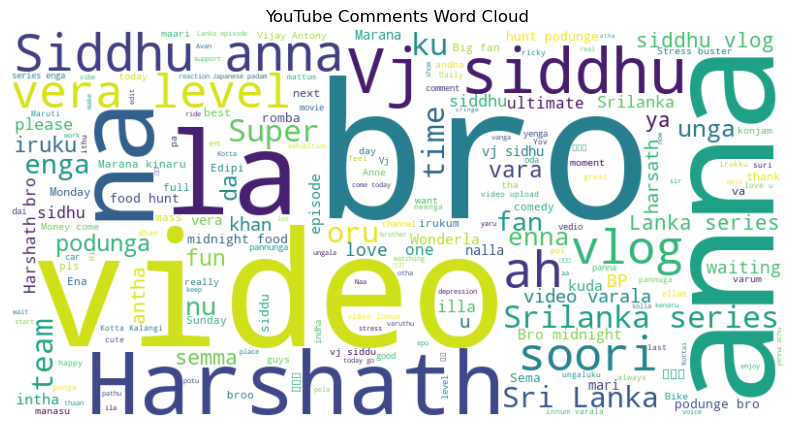

In [58]:
# Concatenate all comments into a single string
all_comments = ' '.join(df['Comment'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('YouTube Comments Word Cloud')
plt.axis('off')  # Hide axes
plt.show()

# VADER Sentiment Scoring

In [59]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import plotly.express as px

analyzer= SentimentIntensityAnalyzer()

In [75]:
# Perform sentiment analysis and add scores to the dataframe
df['Sentiment_Scores'] = df['Processed_Comments'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound sentiment score
df['Compound_Score'] = df['Sentiment_Scores'].apply(lambda x: x['compound'])

# Categorize sentiment as positive, negative, or neutral
df['Sentiment'] = df['Compound_Score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Visualize the sentiment distribution using Plotly
fig = px.histogram(df, x='Sentiment', color='Sentiment', title='Sentiment Distribution',
                   labels={'Sentiment': 'Sentiment Category', 'count': 'Frequency'},
                   color_discrete_map={'positive': 'green', 'negative': 'red', 'neutral': 'blue'})
fig.show()